In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import sqlite3
%matplotlib inline

In [4]:
db = sqlite3.connect(r'C:\users\ajcth\documents\github\sql_analysis\resources\sqlite-sakila.db')

df = pd.read_sql('''
    SELECT
            rental.rental_id, rental.rental_date, rental.return_date,
            customer.last_name AS customer_lastname,
            store.store_id,
            city.city AS rental_store_city,
            film.title AS film_title, film.rental_duration AS film_rental_duration,
            film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
            film.rating AS film_rating
        FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''',
db, index_col='rental_id', parse_dates=['rental_date', 'return_date']                 
)

In [5]:
df.head(10)


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [8]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

<AxesSubplot:>

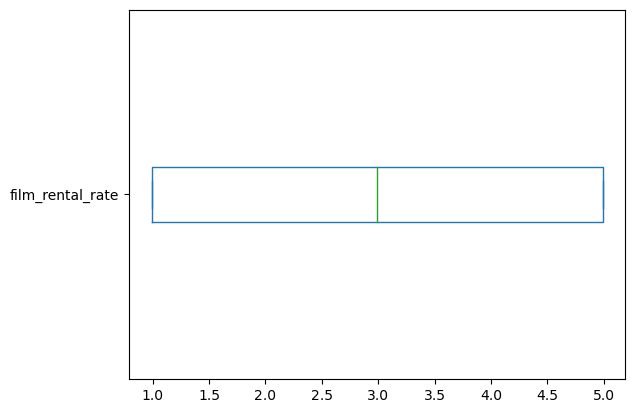

In [10]:
df['film_rental_rate'].plot(kind='box', vert=False)

<AxesSubplot:ylabel='Density'>

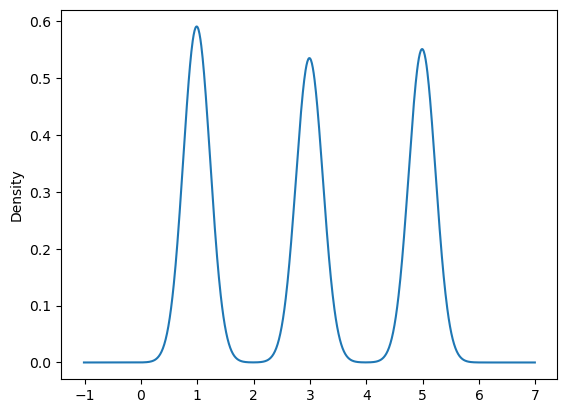

In [11]:
df['film_rental_rate'].plot(kind='density')

Text(0, 0.5, 'Rental Count')

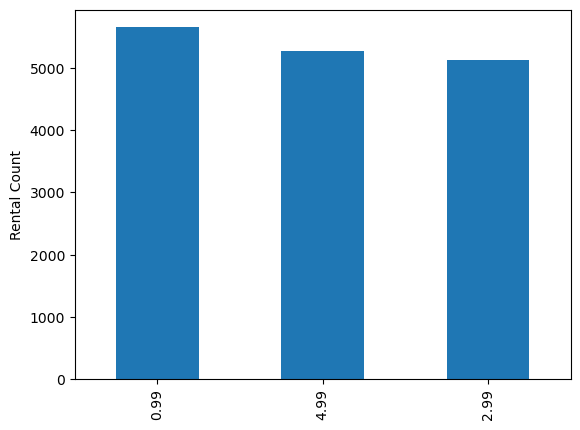

In [12]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar')
ax.set_ylabel('Rental Count')

In [13]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:ylabel='rental_store_city'>

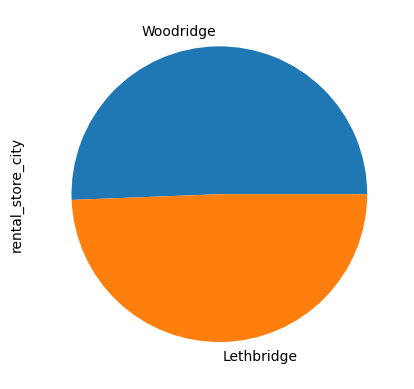

In [14]:
df['rental_store_city'].value_counts().plot(kind='pie')

Text(0, 0.5, 'Rental Count')

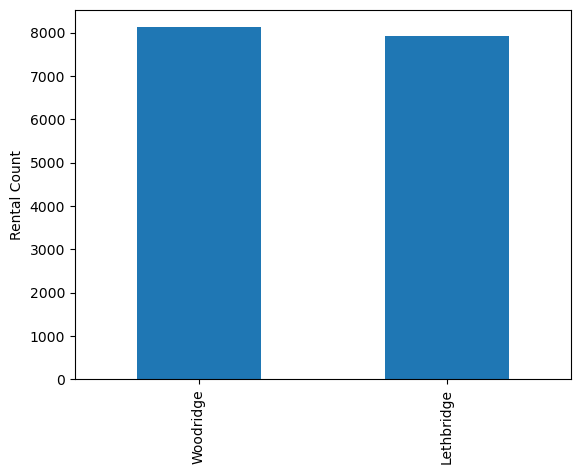

In [15]:
ax = df['rental_store_city'].value_counts().plot(kind='bar')
ax.set_ylabel('Rental Count')

In [16]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

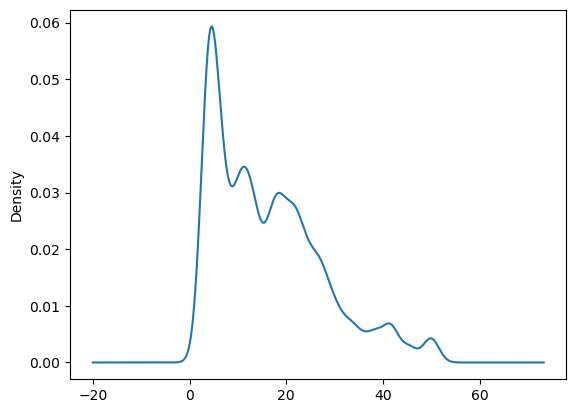

In [18]:
df['rental_gain_return'].plot(kind='density')

In [20]:
df['rental_gain_return'].mean()

16.343824010240393

In [23]:
df['rental_gain_return'].median()

13.597089586175537

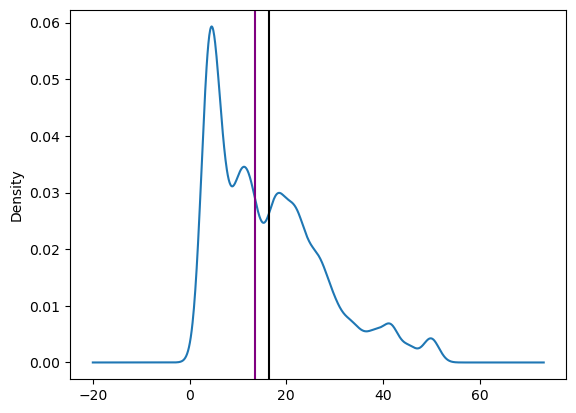

In [24]:
ax = df['rental_gain_return'].plot(kind='density') 
ax.axvline(df['rental_gain_return'].mean(), color='black')
ax.axvline(df['rental_gain_return'].median(), color='purple')